<a href="https://colab.research.google.com/github/douyang/echonet-function-evaluation/blob/master/Calculations_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Image Samples

In [1]:
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np

In [2]:
path = "/content/0X100CF05D141FF143.avi_148.png"

#Get all of the coordinates of the edge of the segmented mask(Red Version)

In [3]:
# # read image
# img = cv2.imread(path)
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # set lower and upper bounds on blue color
# lower = (100,0,0)
# upper = (255,0,0)

# # threshold and invert so hexagon is white on black background
# thresh = cv2.inRange(rgb, lower, upper)

# # get contours
# result = np.zeros_like(thresh)
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# points = []
# # list contour points
# for pt in contours:
#     for i in pt:
#       for coord in i:
#         points.append(coord.tolist())
# print(points)

# print("Number of points: ", len(points))
# # show thresh and contour  
# cv2_imshow(thresh)
# cv2_imshow(img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Blue Version

In [4]:
# # read image
# img = cv2.imread(path)
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # set lower and upper bounds on blue color
# lower = (0,0,100)
# upper = (255,255,255)

# # threshold and invert so hexagon is white on black background
# thresh = cv2.inRange(rgb, lower, upper)


# # get contours
# result = np.zeros_like(thresh)
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# points = []
# # list contour points
# for pt in contours:
#     for i in pt:
#       for coord in i:
#         points.append(coord.tolist())
# print(points)

# print("Number of points: ", len(points))
# # show thresh and contour  
# cv2_imshow(thresh)
# cv2_imshow(img)
# # cv2_imshow(opening)
# # cv2_imshow(closing)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Mask from binary mask

[[51, 24], [51, 25], [51, 26], [51, 27], [51, 28], [51, 29], [52, 30], [52, 31], [52, 32], [52, 33], [52, 34], [52, 35], [52, 36], [52, 37], [52, 38], [52, 39], [52, 40], [52, 41], [52, 42], [52, 43], [52, 44], [52, 45], [52, 46], [52, 47], [52, 48], [52, 49], [52, 50], [52, 51], [51, 52], [51, 53], [51, 54], [51, 55], [51, 56], [51, 57], [50, 58], [50, 59], [49, 60], [49, 61], [49, 62], [49, 63], [49, 64], [49, 65], [49, 66], [49, 67], [49, 68], [50, 69], [50, 70], [50, 71], [51, 71], [52, 71], [53, 71], [54, 71], [55, 71], [56, 71], [57, 71], [58, 71], [59, 71], [60, 70], [61, 70], [62, 70], [63, 70], [64, 70], [65, 70], [66, 69], [67, 69], [68, 69], [69, 69], [70, 69], [70, 68], [70, 67], [70, 66], [70, 65], [70, 64], [70, 63], [70, 62], [70, 61], [70, 60], [70, 59], [69, 58], [69, 57], [69, 56], [69, 55], [69, 54], [69, 53], [69, 52], [68, 51], [68, 50], [68, 49], [68, 48], [68, 47], [67, 46], [67, 45], [67, 44], [66, 43], [66, 42], [66, 41], [66, 40], [66, 39], [65, 38], [65, 37],

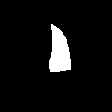

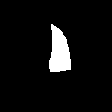

In [5]:
# read image
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# set lower and upper bounds on blue color
lower = (200,200,200)
upper = (255,255,255)

# threshold and invert so hexagon is white on black background
thresh = cv2.inRange(rgb, lower, upper)

# get contours
result = np.zeros_like(thresh)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

points = []
# list contour points
for pt in contours:
    for i in pt:
      for coord in i:
        points.append(coord.tolist())
print(points)

print("Number of points: ", len(points))
# show thresh and contour  
cv2_imshow(img)
cv2_imshow(thresh)

# cv2_imshow(opening)
# cv2_imshow(closing)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
pointGroups = []
index = 0
subgroup = [points[0]]

for i in range(len(points) - 1):
  prevPoint = points[i]
  currentPoint = points[i+1]

  if abs(prevPoint[0]-currentPoint[0]) <= 1 and abs(prevPoint[1]-currentPoint[1]) <= 1:
    subgroup.append(currentPoint)
  else:
    pointGroups.append(subgroup[:])
    subgroup = [currentPoint]

pointGroups.append(subgroup)

mainPointGroup = []
maxPointGroupSize = 0

for group in pointGroups:
  if len(group) > maxPointGroupSize:
    maxPointGroup = group
    maxPointGroupSize = len(group)

points = maxPointGroup[:]

# Top 5 and Bottom 5 Analysis(Heuristic 2)


In [7]:
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Minimum and Maximum Y Coord
maxY = max(points, key = lambda point: point[1])
minY = min(points, key = lambda point: point[1])

# MinY and MaxY With the limits
minYWith5 = minY[1] + 5
maxYWithout5 = maxY[1] - 15

# Creating these arrays
minYWith5Arr = []
maxYWithout5Arr = []

# Finding these points
for point in points:
  if point[1] == minYWith5:
    minYWith5Arr.append(point)
  if point[1] == maxYWithout5:
    maxYWithout5Arr.append(point)

# Average X Coordinates
averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

if slope > 0:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)
else:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


# Creating these arrays
averageTopXArr = []
averageBottomXArr = []

# Finding these points
condition = True
if slope > 0:
  while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX += 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr -= 1
else:
  while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX -= 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr += 1

# Sorting Arrs
averageTopXArr.sort(key=lambda point: point[1])
averageBottomXArr.sort(key=lambda point: point[1])
averageBottomXArr.reverse()


# Finding Min Top and Max Bottom
TopCoord = averageTopXArr[0]
BottomCoord = averageBottomXArr[0]

x1, y1 = TopCoord
x2, y2 = BottomCoord

if (x1 + y1) > (x2 + y2):
  x1, y1, x2, y2 = x2, y2, x1, y1

print(x1, y1, x2, y2)

54 26 61 70


# Calculate Weighted Average

In [8]:
import math

# parallel_dist = distance/21

weighted_avg = []

for n in range(1, 21, 1):
  x_perpendicular = (((n*x1)+(21-n)*(x2))/21)
  y_perpendicular = (((n*y1)+(21-n)*(y2))/21)
  weighted_avg.append([x_perpendicular, y_perpendicular])

print(weighted_avg)

[[60.666666666666664, 67.9047619047619], [60.333333333333336, 65.80952380952381], [60.0, 63.714285714285715], [59.666666666666664, 61.61904761904762], [59.333333333333336, 59.523809523809526], [59.0, 57.42857142857143], [58.666666666666664, 55.333333333333336], [58.333333333333336, 53.23809523809524], [58.0, 51.142857142857146], [57.666666666666664, 49.04761904761905], [57.333333333333336, 46.95238095238095], [57.0, 44.857142857142854], [56.666666666666664, 42.76190476190476], [56.333333333333336, 40.666666666666664], [56.0, 38.57142857142857], [55.666666666666664, 36.476190476190474], [55.333333333333336, 34.38095238095238], [55.0, 32.285714285714285], [54.666666666666664, 30.19047619047619], [54.333333333333336, 28.095238095238095]]


# Find All Mask White points

In [9]:
p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherIntercept = points[lowerIndex:higherIndex]
lowerIntercept = points[higherIndex:] + points[:lowerIndex]

if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
  lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

print(lowerIntercept)
print(higherIntercept)

[[61, 70], [62, 70], [63, 70], [64, 70], [65, 70], [66, 69], [67, 69], [68, 69], [69, 69], [70, 69], [70, 68], [70, 67], [70, 66], [70, 65], [70, 64], [70, 63], [70, 62], [70, 61], [70, 60], [70, 59], [69, 58], [69, 57], [69, 56], [69, 55], [69, 54], [69, 53], [69, 52], [68, 51], [68, 50], [68, 49], [68, 48], [68, 47], [67, 46], [67, 45], [67, 44], [66, 43], [66, 42], [66, 41], [66, 40], [66, 39], [65, 38], [65, 37], [64, 36], [63, 35], [62, 34], [62, 33], [62, 32], [61, 31], [60, 30], [59, 29], [58, 28], [57, 28], [56, 27], [55, 26]]
[[54, 26], [53, 25], [52, 24], [51, 24], [51, 25], [51, 26], [51, 27], [51, 28], [51, 29], [52, 30], [52, 31], [52, 32], [52, 33], [52, 34], [52, 35], [52, 36], [52, 37], [52, 38], [52, 39], [52, 40], [52, 41], [52, 42], [52, 43], [52, 44], [52, 45], [52, 46], [52, 47], [52, 48], [52, 49], [52, 50], [52, 51], [51, 52], [51, 53], [51, 54], [51, 55], [51, 56], [51, 57], [50, 58], [50, 59], [49, 60], [49, 61], [49, 62], [49, 63], [49, 64], [49, 65], [49, 66]

In [31]:
def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]
  
  print(higherIntercept)

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        higherIndex = max(higherIndex, 1)
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = higherIntercept[higherIndex-1]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
        print(slopeCond and not betweenCond, count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

        count += 1
        higherIndex += 1

        if perp_slope == 10000:
          if (point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0]):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
        elif not (len(higherInterceptAveragePoints)>0 and higherInterceptAveragePoints[0] == point and point == start_point):
          if slopeCond and not betweenCond:
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif abs(perp_slope) >= 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif count >= len(higherIntercept)-1:
            higherIndex -= count
            if higherIndex == 0:
              higherInterceptAveragePoints.append(start_point)
            else:
              higherInterceptAveragePoints.append(higherIntercept[higherIndex])
            condition = False
            higherIndex -= 1

    except:
      higherInterceptAveragePoints.append(higherIntercept[-1])
  
  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        lowerIndex = max(lowerIndex, 1)
        point = lowerIntercept[lowerIndex]

        if lowerIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]

        else:
          prev_point = lowerIntercept[lowerIndex-1]


        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
        # print(slopeCond and not betweenCond, count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

# False 0 [52, 50] [52, 49] [52.76190476190476, 49.04761904761905] 0.06250000000000466 -1.25 -16.0
# False 0 [52, 50] [52, 49] [53.523809523809526, 49.095238095238095] 0.06249999999999971 -0.5937499999999996 -16.0
# False 0 [52, 50] [52, 49] [54.285714285714285, 49.142857142857146] 0.06250000000000136 -0.37499999999999883 -16.0
# False 0 [52, 50] [52, 49] [55.04761904761905, 49.19047619047619] 0.06249999999999971 -0.26562499999999994 -16.0
# False 0 [52, 50] [52, 49] [55.80952380952381, 49.23809523809524] 0.0625000000000007 -0.19999999999999926 -16.0


        count += 1
        lowerIndex += 1

        if perp_slope == 10000:
          if ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
        elif not (len(lowerInterceptAveragePoints)>0 and lowerInterceptAveragePoints[0] == point and point == start_point):
          if slopeCond and not betweenCond:
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif abs(perp_slope) > 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif count >= len(lowerIntercept)-1:
            lowerIndex -= count
            if lowerIndex == 0:
              lowerInterceptAveragePoints.append(start_point)
            else:
              lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
            condition = False
            lowerIndex -= 1
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[-1])

  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)


# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

In [32]:
i = 28

x1, y1 = lowerIntercept[i]
x2, y2 = higherIntercept[i]

slope = getSlope([x1, y1], [x2, y2])

p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherInterceptPoints = points[lowerIndex:higherIndex]
lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
  lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)

[[52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50]]
False 0 [52, 47] [52, 48] [52.76190476190476, 49.04761904761905] 1.3750000000000093 2.687500000000014 -16.0
False 1 [52, 46] [52, 47] [52.76190476190476, 49.04761904761905] 2.687500000000014 4.000000000000019 -16.0
False 2 [52, 45] [52, 46] [52.76190476190476, 49.04761904761905] 4.000000000000019 5.312500000000023 -16.0
False 3 [52, 44] [52, 45] [52.76190476190476, 49.04761904761905] 5.312500000000023 6.625000000000028 -16.0
False 4 [52, 43] [52, 44] [52.

68 50
52 49
[[52.76190476190476, 49.04761904761905], [53.523809523809526, 49.095238095238095], [54.285714285714285, 49.142857142857146], [55.04761904761905, 49.19047619047619], [55.80952380952381, 49.23809523809524], [56.57142857142857, 49.285714285714285], [57.333333333333336, 49.333333333333336], [58.095238095238095, 49.38095238095238], [58.857142857142854, 49.42857142857143], [59.61904761904762, 49.476190476190474], [60.38095238095238, 49.523809523809526], [61.142857142857146, 49.57142857142857], [61.904761904761905, 49.61904761904762], [62.666666666666664, 49.666666666666664], [63.42857142857143, 49.714285714285715], [64.19047619047619, 49.76190476190476], [64.95238095238095, 49.80952380952381], [65.71428571428571, 49.857142857142854], [66.47619047619048, 49.904761904761905], [67.23809523809524, 49.95238095238095]]


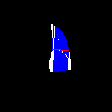

[[52, 49], [52, 50], [52, 51], [51, 52], [51, 53], [51, 54], [51, 55], [51, 56], [51, 57], [50, 58], [50, 59], [49, 60], [49, 61], [49, 62], [49, 63], [49, 64], [49, 65], [49, 66], [49, 67], [49, 68], [50, 69], [50, 70], [50, 71], [51, 71], [52, 71], [53, 71], [54, 71], [55, 71], [56, 71], [57, 71], [58, 71], [59, 71], [60, 70], [61, 70], [62, 70], [63, 70], [64, 70], [65, 70], [66, 69], [67, 69], [68, 69], [69, 69], [70, 69], [70, 68], [70, 67], [70, 66], [70, 65], [70, 64], [70, 63], [70, 62], [70, 61], [70, 60], [70, 59], [69, 58], [69, 57], [69, 56], [69, 55], [69, 54], [69, 53], [69, 52], [68, 51]]
[[68, 50], [68, 49], [68, 48], [68, 47], [67, 46], [67, 45], [67, 44], [66, 43], [66, 42], [66, 41], [66, 40], [66, 39], [65, 38], [65, 37], [64, 36], [63, 35], [62, 34], [62, 33], [62, 32], [61, 31], [60, 30], [59, 29], [58, 28], [57, 28], [56, 27], [55, 26], [54, 26], [53, 25], [52, 24], [51, 24], [51, 25], [51, 26], [51, 27], [51, 28], [51, 29], [52, 30], [52, 31], [52, 32], [52, 33]

In [33]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for i in range(len(lowerInterceptAveragePoints)): 
  # cv2.circle(image,tuple(lowerInterceptAveragePoints[i]), 1, (0,255,0), -1)
  cv2.line(image, tuple(lowerInterceptAveragePoints[i]), tuple(higherInterceptAveragePoints[i]), (255,0,0), 1)
cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)

print(lowerInterceptPoints)
print(higherInterceptPoints)
print(weighted_avg)
print(lowerInterceptAveragePoints)
print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

# Split points into 2

In [13]:
# def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
#   # Calculate perpendicular slope
#   try:
#     perp_slope = -1/slope
#   except:
#     perp_slope = 10000

#   # Indexing
#   lowerIndex = 0
#   higherIndex = 0

#   # Make sure its from top to bottom direction
#   if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
#     weighted_avg = weighted_avg[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
#       higherIntercept = higherIntercept[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
#       lowerIntercept = lowerIntercept[::-1]

#   higherInterceptAveragePoints = []
#   lowerInterceptAveragePoints = []

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         point = higherIntercept[higherIndex]
#         if higherIndex == 0:
#           prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = higherIntercept[higherIndex-1]
        
#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         if slopeCond and not betweenCond:
#           higherInterceptAveragePoints.append(point)
#           condition = False
#         elif abs(perp_slope) >= 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
#           higherInterceptAveragePoints.append(point)
#           condition = False
#         elif count > len(higherIntercept)/2:
#           higherIndex -= count
#           if higherIndex == 0:
#             higherInterceptAveragePoints.append(start_point)
#           else:
#             higherInterceptAveragePoints.append(higherIntercept[higherIndex])
#           condition = False
        
#         count += 1
#         higherIndex += 1
#     except:
#       higherInterceptAveragePoints.append(higherIntercept[higherIndex - 1])

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         point = lowerIntercept[lowerIndex]
#         if lowerIndex == 0:
#           prev_point = [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = lowerIntercept[lowerIndex-1]

#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         if slopeCond and not betweenCond:
#           lowerInterceptAveragePoints.append(point)
#           condition = False
#         elif abs(perp_slope) > 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
#           lowerInterceptAveragePoints.append(point)
#           condition = False
#         elif count > len(lowerIntercept)/2:
#           lowerIndex -= count
#           if lowerIndex == 0:
#             lowerInterceptAveragePoints.append(start_point)
#           else:
#             lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
#           condition = False
        
#         count += 1
#         lowerIndex += 1
#     except:
#       lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex - 1])
  
#   if i == 30:
#       print(higherIntercept)
#       print(lowerIntercept)
#       print(weighted_avg)
#       print(lowerInterceptAveragePoints)
#       print(higherInterceptAveragePoints)
#   return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

#  \


In [14]:
# i = 30

# x1, y1 = lowerIntercept[i]
# x2, y2 = higherIntercept[i]

# print(x1, y1, x2, y2)

# slope = getSlope([x1, y1], [x2, y2])

# p1Index = points.index([x1, y1])
# p2Index = points.index([x2, y2])

# lowerIndex = min(p1Index, p2Index)
# higherIndex = max(p1Index, p2Index)

# higherInterceptPoints = points[lowerIndex:higherIndex]
# lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

# if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
#   lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

# weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
# lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)

68 50
52 49
[[52.76190476190476, 49.04761904761905], [53.523809523809526, 49.095238095238095], [54.285714285714285, 49.142857142857146], [55.04761904761905, 49.19047619047619], [55.80952380952381, 49.23809523809524], [56.57142857142857, 49.285714285714285], [57.333333333333336, 49.333333333333336], [58.095238095238095, 49.38095238095238], [58.857142857142854, 49.42857142857143], [59.61904761904762, 49.476190476190474], [60.38095238095238, 49.523809523809526], [61.142857142857146, 49.57142857142857], [61.904761904761905, 49.61904761904762], [62.666666666666664, 49.666666666666664], [63.42857142857143, 49.714285714285715], [64.19047619047619, 49.76190476190476], [64.95238095238095, 49.80952380952381], [65.71428571428571, 49.857142857142854], [66.47619047619048, 49.904761904761905], [67.23809523809524, 49.95238095238095]]


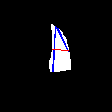

In [15]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for i in range(len(lowerInterceptAveragePoints)): 
  # cv2.circle(image,tuple(lowerInterceptAveragePoints[i]), 1, (0,255,0), -1)
  cv2.line(image, tuple(lowerInterceptAveragePoints[i]), tuple(higherInterceptAveragePoints[i]), (255,0,0), 1)
cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)


# print(lowerInterceptAveragePoints)
# print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

# Method of Disks

In [16]:
distance = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

volume = 0

for i in range(len(lowerInterceptAveragePoints)):
  diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  radius = diameter/2
  diskVolume = math.pi * radius**2 * parallelSeperationDistance
  volume += diskVolume

print(volume)

3643.5638509976748


# Prolate Ellipsoid Model (Single Ellipsoid Method)

In [17]:
long_axis_length = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

# Manual Area Calc
area = 0

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  diskArea = length * parallelSeperationDistance
  area += diskArea

volume = 0.85 * area * long_axis_length

print(volume)

1898.9764603872618


# Prolate Ellipsoid Model (Biplane Area Length)

In [18]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Storing all perp lens
lengthArr = []

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  lengthArr.append(length)

# 3 diff heuristics
averageLength = sum(lengthArr)/len(lengthArr)
maxLength = max(lengthArr)
midLength = lengthArr[len(lengthArr)//2]

# Volume Calc
volume = math.pi/6 * midLength**2 * long_axis_length

print(volume)

8.393926923476622


# Bullet Method


In [19]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Mid Values
midIndex = len(lengthArr)//2
midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

area = math.pi * (midLength/2)**2 

# Volume Calc
volume = 5/6 * area * long_axis_length

print(volume)

10.492408654345779


# Will become local file


[[52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54]]
-30


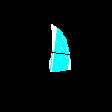

[[51, 52], [52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53]]
-29


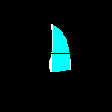

[[51, 53], [51, 52], [52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52]]
-28


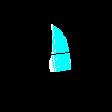

[[51, 54], [51, 53], [51, 52], [52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51]]
-27


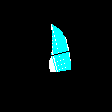

[[51, 55], [51, 54], [51, 53], [51, 52], [52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50]]
-26


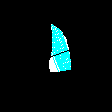

[[51, 56], [51, 55], [51, 54], [51, 53], [51, 52], [52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49]]
-25


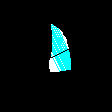

[[51, 57], [51, 56], [51, 55], [51, 54], [51, 53], [51, 52], [52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48]]
-24


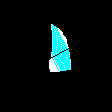

[[50, 58], [51, 57], [51, 56], [51, 55], [51, 54], [51, 53], [51, 52], [52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47]]
-23


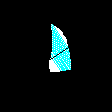

[[50, 59], [50, 58], [51, 57], [51, 56], [51, 55], [51, 54], [51, 53], [51, 52], [52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46]]
-22


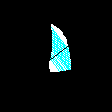

[[49, 60], [50, 59], [50, 58], [51, 57], [51, 56], [51, 55], [51, 54], [51, 53], [51, 52], [52, 51], [52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45]]
-21


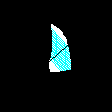

[[49, 62], [49, 63], [49, 64], [49, 65], [49, 66], [49, 67], [49, 68], [50, 69], [50, 70], [50, 71], [51, 71], [52, 71], [53, 71], [54, 71], [55, 71], [56, 71], [57, 71], [58, 71], [59, 71], [60, 70], [61, 70], [62, 70], [63, 70], [64, 70], [65, 70], [66, 69], [67, 69], [68, 69], [69, 69], [70, 69], [70, 68], [70, 67], [70, 66], [70, 65], [70, 64], [70, 63], [70, 62], [70, 61], [70, 60], [70, 59], [69, 58], [69, 57], [69, 56], [69, 55], [69, 54], [69, 53], [69, 52], [68, 51], [68, 50], [68, 49], [68, 48], [68, 47], [67, 46], [67, 45]]
-20


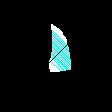

[[67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71], [51, 71], [50, 71], [50, 70], [50, 69], [49, 68], [49, 67], [49, 66], [49, 65], [49, 64], [49, 63]]
-19


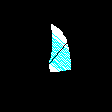

[[66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71], [51, 71], [50, 71], [50, 70], [50, 69], [49, 68], [49, 67], [49, 66], [49, 65], [49, 64]]
-18


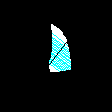

[[66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71], [51, 71], [50, 71], [50, 70], [50, 69], [49, 68], [49, 67], [49, 66], [49, 65]]
-17


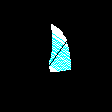

[[66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71], [51, 71], [50, 71], [50, 70], [50, 69], [49, 68], [49, 67], [49, 66]]
-16


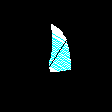

[[66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71], [51, 71], [50, 71], [50, 70], [50, 69], [49, 68], [49, 67]]
-15


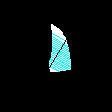

[[66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71], [51, 71], [50, 71], [50, 70], [50, 69], [49, 68]]
-14


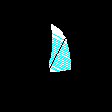

[[65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71], [51, 71], [50, 71], [50, 70], [50, 69]]
-13


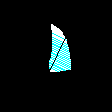

[[65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71], [51, 71], [50, 71], [50, 70]]
-12


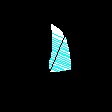

[[64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71], [51, 71], [50, 71]]
-11


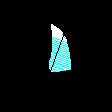

[[63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71], [51, 71]]
-10


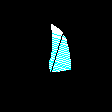

[[62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71], [52, 71]]
-9


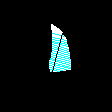

[[62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71], [53, 71]]
-8


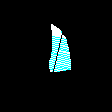

[[62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71], [54, 71]]
-7


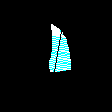

[[61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71], [55, 71]]
-6


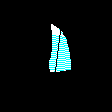

[[60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71], [56, 71]]
-5


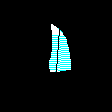

[[59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71], [57, 71]]
-4


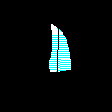

[[58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71], [58, 71]]
-3


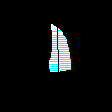

[[57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70], [59, 71]]
-2


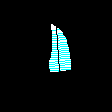

[[56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70], [60, 70]]
-1


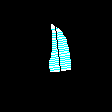

[[55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70], [61, 70]]
0


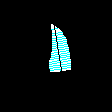

[[54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70], [62, 70]]
1


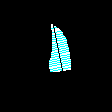

[[53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70], [63, 70]]
2


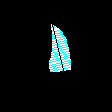

[[52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70], [64, 70]]
3


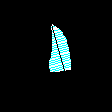

[[51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69], [65, 70]]
4


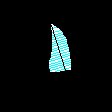

[[51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69], [66, 69]]
5


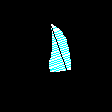

[[51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69], [67, 69]]
6


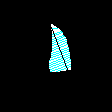

[[51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69], [68, 69]]
7


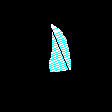

[[51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69], [69, 69]]
8


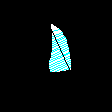

[[51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68], [70, 69]]
9


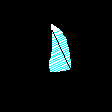

[[52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67], [70, 68]]
10


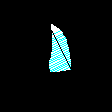

[[52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66], [70, 67]]
11


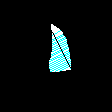

[[52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65], [70, 66]]
12


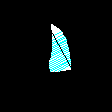

[[52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64], [70, 65]]
13


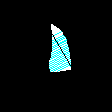

[[52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63], [70, 64]]
14


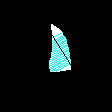

[[52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62], [70, 63]]
15


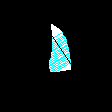

[[52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61], [70, 62]]
16


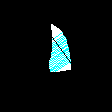

[[52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60], [70, 61]]
17


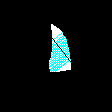

[[52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59], [70, 60]]
18


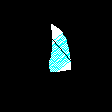

[[52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58], [70, 59]]
19


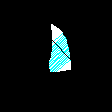

[[52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57], [69, 58]]
20


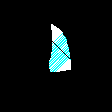

[[52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56], [69, 57]]
21


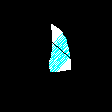

[[52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55], [69, 56]]
22


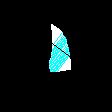

[[52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54], [69, 55]]
23


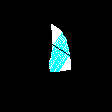

[[52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53], [69, 54]]
24


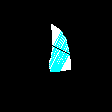

[[52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52], [69, 53]]
25


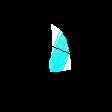

[[52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51], [69, 52]]
26


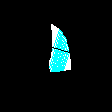

[[52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50], [68, 51]]
27


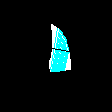

[[52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49], [68, 50]]
28


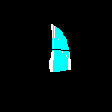

[[52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48], [68, 49]]
29


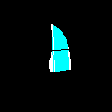

[[52, 50], [52, 49], [52, 48], [52, 47], [52, 46], [52, 45], [52, 44], [52, 43], [52, 42], [52, 41], [52, 40], [52, 39], [52, 38], [52, 37], [52, 36], [52, 35], [52, 34], [52, 33], [52, 32], [52, 31], [52, 30], [51, 29], [51, 28], [51, 27], [51, 26], [51, 25], [51, 24], [52, 24], [53, 25], [54, 26], [55, 26], [56, 27], [57, 28], [58, 28], [59, 29], [60, 30], [61, 31], [62, 32], [62, 33], [62, 34], [63, 35], [64, 36], [65, 37], [65, 38], [66, 39], [66, 40], [66, 41], [66, 42], [66, 43], [67, 44], [67, 45], [67, 46], [68, 47], [68, 48]]
30


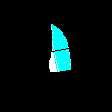

({-30: 15202.246440753535, -29: 18379.663420351822, -28: 18777.93076443639, -27: 18011.578561685994, -26: 16876.814128205224, -25: 15232.006519853543, -24: 14068.393843858668, -23: 12527.04469563349, -22: 10919.881459508115, -21: 10176.212182818708, -20: 9642.325370928844, -19: 8532.964036489957, -18: 8505.770044104529, -17: 8405.928153500523, -16: 8474.225223759122, -15: 8589.154498278886, -14: 8452.30543483317, -13: 8440.743831015981, -12: 8347.330777382776, -11: 8160.9447934211385, -10: 8462.711484970061, -9: 8408.95615622406, -8: 8319.943651388663, -7: 8135.843029097502, -6: 8459.087932914354, -5: 8453.51760796301, -4: 8467.833916989039, -3: 8810.472333462949, -2: 8773.24746917118, -1: 8595.610769053961, 0: 8656.381616947348, 1: 8839.078667007063, 2: 8993.093744833406, 3: 9071.187664735147, 4: 9013.751681726708, 5: 8933.475592442772, 6: 9157.635856000916, 7: 9088.408165748908, 8: 9180.172170584392, 9: 9124.668754897015, 10: 9023.874097139651, 11: 9043.728219621566, 12: 9048.1064835

In [35]:
import cv2
import numpy as np
import math
import os

# Gets all the contours for certain image
def obtainContourPoints(path):
  # read image
  img = cv2.imread(path)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # set lower and upper bounds on blue color
  lower = (200,200,200)
  upper = (255,255,255)

  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(rgb, lower, upper)

  # get contours
  result = np.zeros_like(thresh)
  contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord.tolist())
  
  return points

def getIdealPointGroup(points):
  pointGroups = []
  index = 0
  subgroup = [points[0]]

  for i in range(len(points) - 1):
    prevPoint = points[i]
    currentPoint = points[i+1]

    if (abs(int(prevPoint[0])-int(currentPoint[0])) <= 1) and (abs(int(prevPoint[1])-int(currentPoint[1])) <= 1):
      subgroup.append(currentPoint)
    else:
      pointGroups.append(subgroup[:])
      subgroup = [currentPoint]

  pointGroups.append(subgroup)

  mainPointGroup = []
  maxPointGroupSize = 0

  for group in pointGroups:
    if len(group) > maxPointGroupSize:
      maxPointGroup = group
      maxPointGroupSize = len(group)

  return maxPointGroup

# Finds points for main contour line
def getTopAndBottomCoords(points):
  # Minimum and Maximum Y Coord
  maxY = max(points, key = lambda point: point[1])
  minY = min(points, key = lambda point: point[1])

  # MinY and MaxY With the limits
  minYWith5 = minY[1] + 5
  maxYWithout5 = maxY[1] - 15

  # Creating these arrays
  minYWith5Arr = []
  maxYWithout5Arr = []

  # Finding these points
  for point in points:
    if point[1] == minYWith5:
      minYWith5Arr.append(point)
    if point[1] == maxYWithout5:
      maxYWithout5Arr.append(point)

  # Average X Coordinates
  averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
  averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
  slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


  # Creating these arrays
  averageTopXArr = []
  averageBottomXArr = []

  # Finding these points
  condition = True
  if slope > 0:
    while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX += 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr -= 1
  else:
    while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX -= 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr += 1

  # Sorting Arrs
  averageTopXArr.sort(key=lambda point: point[1])
  averageBottomXArr.sort(key=lambda point: point[1])
  averageBottomXArr.reverse()


  # Finding Min Top and Max Botpp,
  TopCoord = averageTopXArr[0]
  BottomCoord = averageBottomXArr[0]

  x1, y1 = TopCoord
  x2, y2 = BottomCoord

  return (x1, y1, x2, y2)


# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

def splitPoints(x1, y1, x2, y2, slope, points):
  p1Index = points.index([x1, y1])
  p2Index = points.index([x2, y2])

  lowerIndex = min(p1Index, p2Index)
  higherIndex = max(p1Index, p2Index)

  higherIntercept = points[lowerIndex:higherIndex]
  lowerIntercept = points[higherIndex:] + points[:lowerIndex]

  return (lowerIntercept, higherIntercept)

# Distance Between 2 Pointss
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Slope between points 
def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Change to Method of Disks
def volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length and perp initialzation
  distance = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/(number + 1)

  # Simpson Volume Methods
  volume = 0

  for i in range(len(lowerInterceptAveragePoints)):
    diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    radius = diameter/2
    diskVolume = math.pi * radius**2 * parallelSeperationDistance
    volume += diskVolume

  return volume

# Prolate Ellipsoid Method
def volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  long_axis_length = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = long_axis_length/21

  # Manual Area Calc
  area = 0

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    diskArea = length * parallelSeperationDistance
    area += diskArea

  volume = 0.85 * area * long_axis_length

  return volume

# Bullet Method Calculation
def volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Storing all perp lens
  lengthArr = []

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    lengthArr.append(length)

  midIndex = len(lengthArr)//2
  midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

  area = math.pi * (midLength/2)**2 

  # Volume Calc
  volume = 5/6 * area * long_axis_length

  return volume


def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]
  
  print(higherIntercept)

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        higherIndex = max(higherIndex, 1)
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = higherIntercept[higherIndex-1]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
        # print(slopeCond and not betweenCond, count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

        count += 1
        higherIndex += 1

        if perp_slope == 10000:
          if (point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0]):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
        elif not (len(higherInterceptAveragePoints)>0 and higherInterceptAveragePoints[0] == point and point == start_point):
          if slopeCond and not betweenCond:
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif abs(perp_slope) >= 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif count >= len(higherIntercept)-1:
            higherIndex -= count
            if higherIndex == 0:
              higherInterceptAveragePoints.append(start_point)
            else:
              higherInterceptAveragePoints.append(higherIntercept[higherIndex])
            condition = False
            higherIndex -= 1

    except:
      higherInterceptAveragePoints.append(higherIntercept[-1])
  
  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        lowerIndex = max(lowerIndex, 1)
        point = lowerIntercept[lowerIndex]

        if lowerIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]

        else:
          prev_point = lowerIntercept[lowerIndex-1]


        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
        # print(slopeCond and not betweenCond, count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

# False 0 [52, 50] [52, 49] [52.76190476190476, 49.04761904761905] 0.06250000000000466 -1.25 -16.0
# False 0 [52, 50] [52, 49] [53.523809523809526, 49.095238095238095] 0.06249999999999971 -0.5937499999999996 -16.0
# False 0 [52, 50] [52, 49] [54.285714285714285, 49.142857142857146] 0.06250000000000136 -0.37499999999999883 -16.0
# False 0 [52, 50] [52, 49] [55.04761904761905, 49.19047619047619] 0.06249999999999971 -0.26562499999999994 -16.0
# False 0 [52, 50] [52, 49] [55.80952380952381, 49.23809523809524] 0.0625000000000007 -0.19999999999999926 -16.0


        count += 1
        lowerIndex += 1

        if perp_slope == 10000:
          if ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
        elif not (len(lowerInterceptAveragePoints)>0 and lowerInterceptAveragePoints[0] == point and point == start_point):
          if slopeCond and not betweenCond:
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif abs(perp_slope) > 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif count >= len(lowerIntercept)-1:
            lowerIndex -= count
            if lowerIndex == 0:
              lowerInterceptAveragePoints.append(start_point)
            else:
              lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
            condition = False
            lowerIndex -= 1
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[-1])

  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)



def calculateVolume(path, number, method = "Method of Disks"):
  points = getIdealPointGroup(obtainContourPoints(path))

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  if (x1 + y1) > (x2 + y2):
    x1, y1, x2, y2 = x2, y2, x1, y1

  mainLineSlope = getSlope([x1, y1], [x2, y2])
  baseAngle = math.atan(mainLineSlope)

  if baseAngle>0:
      baseAngle -= math.pi
  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
    lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}
  degrees = {}

  # Volumes for all 0 to 5 cases
  for i in range(-30, 31, 1):
    x1, y1 = lowerIntercept[i]
    x2, y2 = higherIntercept[i]


    slope = getSlope([x1, y1], [x2, y2])
    angle = math.atan(slope)

    if angle>0:
      angle -= math.pi

    degrees[i] = (baseAngle - angle) * 180/math.pi


    p1Index = points.index([x1, y1])
    p2Index = points.index([x2, y2])

    lowerIndex = min(p1Index, p2Index)
    higherIndex = max(p1Index, p2Index)

    higherInterceptPoints = points[lowerIndex:higherIndex]
    lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

    if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
      lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)
    
    x1s[i] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
    y1s[i] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

    x2s[i] = [x2] + [point[0] for point in higherInterceptAveragePoints]
    y2s[i] = [y2] + [point[1] for point in higherInterceptAveragePoints]

    if i < 100:
      print(i)
      image = cv2.imread(path) 


      # for point in points:
      #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
      #   if point[0] <50:
      #     print(point)


      # for point in weighted_avg: 
      #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
      for j in range(len(lowerInterceptAveragePoints)): 
        cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


      cv2.line(image, (x1, y1), (x2, y2), (0,0,0), 1)

      cv2_imshow(image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()

    if  method == "Method of Disks":
      volumes[i] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Prolate Ellipsoid":
      volumes[i] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet Method":
      volumes[i] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
  return (volumes, x1s, y1s, x2s, y2s, degrees)

print(calculateVolume(path, 20, method = "Method of Disks"))
# print(calculateVolume("/content/output/image.png", method = "Single Ellipsoid"))
# print(calculateVolume("/content/output/image.png", method = "Biplane Area"))
# print(calculateVolume("/content/output/image.png", method = "Bullet"))